<center><h1> GLOBAL WARMING MAP </h1></center>

![caption](files/global_warning_map.png)

# UDACITY Data Analysis Nanodegree Program 

# Project 1 - (Exploring Weather Trends)

*******************************************************************************************************************

In this project, I will analyze local and global temperature data and compare the temperature trends where I live to overall global temperature trends.
I will analyze the data, create a data visualization and write up my findings.


My goal will be to create a visualization and prepare a write up describing the similarities and differences between global temperature trends and temperature trends in the closest big city to where you live. To do this, I will follow the steps below:
-	Extract the data from the database using SQL Query Script then I will need to export the temperature data for the world as well as for the closest big city (LONDON) to where I live.  
To interact with the database, I got used to write this SQL query:

SELECT * FROM global_data;

SELECT * FROM city_data
WHERE city = 'London' AND country = 'United Kingdom';


-	I Wrote above the SQL query script to extract the city level data. Export to CSV.
-	I Wrote a SQL query to extract the global data. Export to CSV.
-	I am opening up the CSV using Jupyter Notebook 
-	I need eagerly to create a line chart that compares my city’s temperatures with the global temperatures. 
    I make sure to plot the moving average rather than the yearly averages in order to smooth out the lines 
    using  plot
-	Make observations about the similarities and differences between the world averages and my city’s averages, 
    as well as overall trends. Here are some questions to get me started.
    -	Is my city hotter or cooler on average compared to the global average? Has the difference been 
        consistent over time?
    -	“How do the changes in my city’s temperatures over time compare to the changes in the global average?” 
    -	What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been 
        consistent over the last few hundred years?

*******************************************************************************************************************

# Summary and Outlook

In [1]:
import pandas as pd # converting an entire data table into a NumPy matrix array
import matplotlib.pyplot as plt # creating or plotting area in a figure, lines  and decorates the plot with labels, etc.
import numpy as np # helping to avoid namespace issues
import seaborn as sns # Importing seaborn

# Importing from CSV and first Inspection

In [3]:
globalTemperature = pd.read_csv('global_data.csv') # importing 'global tempreature data'
cityTemperature = pd.read_csv('city_data.csv') # importing 'city tempreature data' which is a data for Greater London city 

# Overview and validation of data
## Built-in Functions, Attributes and Methods

In [4]:
globalTemperature.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [7]:
print(globalTemperature.head)

<bound method NDFrame.head of      year  avg_temp
0    1750      8.72
1    1751      7.98
2    1752      5.78
3    1753      8.39
4    1754      8.47
..    ...       ...
261  2011      9.52
262  2012      9.51
263  2013      9.61
264  2014      9.57
265  2015      9.83

[266 rows x 2 columns]>


In [8]:
globalTemperature.isnull().head()

,year,avg_temp
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [9]:
globalTemperature.isnull().sum()

year        0
avg_temp    0
dtype: int64

In [10]:
globalTemperature.notnull().head()

,year,avg_temp
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True


In [11]:
globalTemperature.notnull().sum()

year        266
avg_temp    266
dtype: int64

In [12]:
print(globalTemperature.tail)

<bound method NDFrame.tail of      year  avg_temp
0    1750      8.72
1    1751      7.98
2    1752      5.78
3    1753      8.39
4    1754      8.47
..    ...       ...
261  2011      9.52
262  2012      9.51
263  2013      9.61
264  2014      9.57
265  2015      9.83

[266 rows x 2 columns]>


In [13]:
globalTemperature.isnull().tail()

,year,avg_temp
261,False,False
262,False,False
263,False,False
264,False,False
265,False,False


In [14]:
globalTemperature.notnull().tail()

,year,avg_temp
261,True,True
262,True,True
263,True,True
264,True,True
265,True,True


In [15]:
print(type(globalTemperature))

<class 'pandas.core.frame.DataFrame'>


## DataFrame Attributes

In [16]:
# Printing number of rows and columns of the dataset
print(globalTemperature.shape)

(266, 2)


In [17]:
globalTemperature

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
...,...,...
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57


In [18]:
# To know more about the dataset
globalTemperature.describe()

,year,avg_temp
count,266.000000,266.000000
mean,1882.500000,8.369474
std,76.931788,0.584747
min,1750.000000,5.780000
25%,1816.250000,8.082500
50%,1882.500000,8.375000
75%,1948.750000,8.707500
max,2015.000000,9.830000


## DataFrame Methods

In [19]:
# Information about the dataset
globalTemperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [20]:
# names of columns in the dataset
print(globalTemperature.columns)

Index(['year', 'avg_temp'], dtype='object')


In [21]:
globalTemperature.value_counts()

year  avg_temp
2015  9.83        1
1833  8.01        1
1847  8.09        1
1846  8.55        1
1845  7.85        1
                 ..
1921  8.57        1
1920  8.36        1
1919  8.38        1
1918  8.13        1
1750  8.72        1
Length: 266, dtype: int64

In [22]:
print(globalTemperature.dtypes)

year          int64
avg_temp    float64
dtype: object


In [23]:
cityTemperature.head()

,year,city,country,avg_temp
0,1743,London,United Kingdom,7.54
1,1744,London,United Kingdom,10.34
2,1745,London,United Kingdom,4.13
3,1746,London,United Kingdom,NaN
4,1747,London,United Kingdom,NaN


In [24]:
print(cityTemperature.head)

<bound method NDFrame.head of      year    city         country  avg_temp
0    1743  London  United Kingdom      7.54
1    1744  London  United Kingdom     10.34
2    1745  London  United Kingdom      4.13
3    1746  London  United Kingdom       NaN
4    1747  London  United Kingdom       NaN
..    ...     ...             ...       ...
266  2009  London  United Kingdom     10.52
267  2010  London  United Kingdom      9.38
268  2011  London  United Kingdom     11.19
269  2012  London  United Kingdom     10.00
270  2013  London  United Kingdom      9.91

[271 rows x 4 columns]>


In [25]:
print(cityTemperature.tail)

<bound method NDFrame.tail of      year    city         country  avg_temp
0    1743  London  United Kingdom      7.54
1    1744  London  United Kingdom     10.34
2    1745  London  United Kingdom      4.13
3    1746  London  United Kingdom       NaN
4    1747  London  United Kingdom       NaN
..    ...     ...             ...       ...
266  2009  London  United Kingdom     10.52
267  2010  London  United Kingdom      9.38
268  2011  London  United Kingdom     11.19
269  2012  London  United Kingdom     10.00
270  2013  London  United Kingdom      9.91

[271 rows x 4 columns]>


In [26]:
cityTemperature.isnull().tail()

,year,city,country,avg_temp
266,False,False,False,False
267,False,False,False,False
268,False,False,False,False
269,False,False,False,False
270,False,False,False,False


In [27]:
cityTemperature.notnull().tail()

,year,city,country,avg_temp
266,True,True,True,True
267,True,True,True,True
268,True,True,True,True
269,True,True,True,True
270,True,True,True,True


In [28]:
print(type(cityTemperature))

<class 'pandas.core.frame.DataFrame'>


In [29]:
# Printing number of rows and columns of the dataset
print(cityTemperature.shape)

(271, 4)


In [30]:
cityTemperature

,year,city,country,avg_temp
0,1743,London,United Kingdom,7.54
1,1744,London,United Kingdom,10.34
2,1745,London,United Kingdom,4.13
3,1746,London,United Kingdom,NaN
4,1747,London,United Kingdom,NaN
...,...,...,...,...
266,2009,London,United Kingdom,10.52
267,2010,London,United Kingdom,9.38
268,2011,London,United Kingdom,11.19
269,2012,London,United Kingdom,10.00


In [31]:
# names of columns in the dataset
print(cityTemperature.columns)

Index(['year', 'city', 'country', 'avg_temp'], dtype='object')


In [32]:
cityTemperature.value_counts()

year  city    country         avg_temp
2013  London  United Kingdom  9.91        1
1830  London  United Kingdom  8.78        1
1844  London  United Kingdom  8.85        1
1843  London  United Kingdom  9.40        1
1842  London  United Kingdom  9.43        1
                                         ..
1919  London  United Kingdom  8.48        1
1918  London  United Kingdom  9.60        1
1917  London  United Kingdom  8.65        1
1916  London  United Kingdom  9.28        1
1743  London  United Kingdom  7.54        1
Length: 267, dtype: int64

In [33]:
print(cityTemperature.dtypes)

year          int64
city         object
country      object
avg_temp    float64
dtype: object


In [34]:
# To know more about the dataset
cityTemperature.describe()

,year,avg_temp
count,271.000000,267.000000
mean,1878.000000,9.435880
std,78.375166,0.751648
min,1743.000000,4.130000
25%,1810.500000,9.040000
50%,1878.000000,9.420000
75%,1945.500000,9.880000
max,2013.000000,11.190000


In [35]:
# Information about the dataset
cityTemperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      271 non-null    int64  
 1   city      271 non-null    object 
 2   country   271 non-null    object 
 3   avg_temp  267 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.6+ KB


In [36]:
cityTemperature.isnull().sum()

year        0
city        0
country     0
avg_temp    4
dtype: int64

In [37]:
cityTemperature.notnull().sum()

year        271
city        271
country     271
avg_temp    267
dtype: int64

# The Global data and City data by Moving Average.

To evaluate time series data by measuring averages of different subsets of the full dataset, a moving average, often called a rolling or running average, is used. 

In [38]:
global_moving_avg = globalTemperature['avg_temp'].rolling(10).mean()
city_moving_avg = cityTemperature['avg_temp'].rolling(10).mean()

# Data Visualization in Panda.

## Making graphs using Matplotlib, Pandas and Seaborn
## Matplotlib is the most popular python plotting library.

Getting some insight into the Global and London City Temperature data

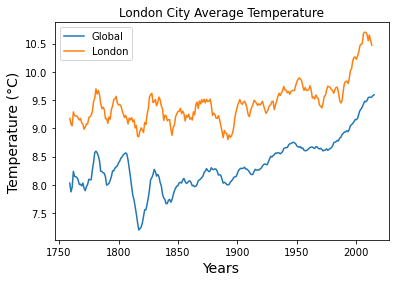

In [39]:
# Comparing in both the City Data(London)and Global Data
plt.plot(globalTemperature['year'],global_moving_avg,label='Global')
plt.plot(cityTemperature['year'],city_moving_avg,label='London')
plt.legend()
plt.xlabel("Years", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14) 
plt.title("London City Average Temperature")
plt.show()

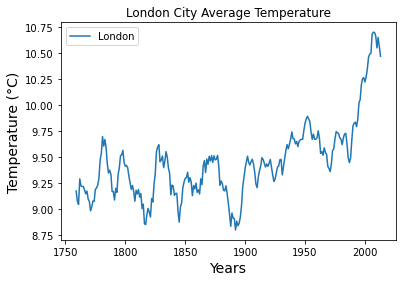

In [40]:
# Visualizing the City Data(London)
plt.plot(cityTemperature['year'],city_moving_avg,label='London')
plt.legend()
plt.xlabel("Years", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14) 
plt.title("London City Average Temperature")
plt.show()

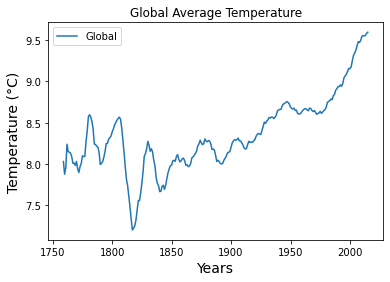

In [41]:
# Visualizing the Global Data
plt.plot(globalTemperature['year'],global_moving_avg,label='Global')
plt.legend()
plt.xlabel("Years", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14) 
plt.title("Global Average Temperature")
plt.show()

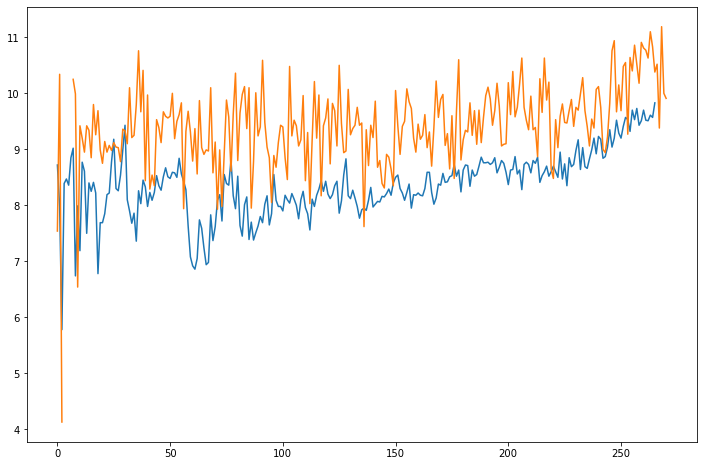

In [42]:
globalTemperature.avg_temp.plot(figsize=(12, 8))
cityTemperature.avg_temp.plot(figsize=(12, 8))
plt.show()

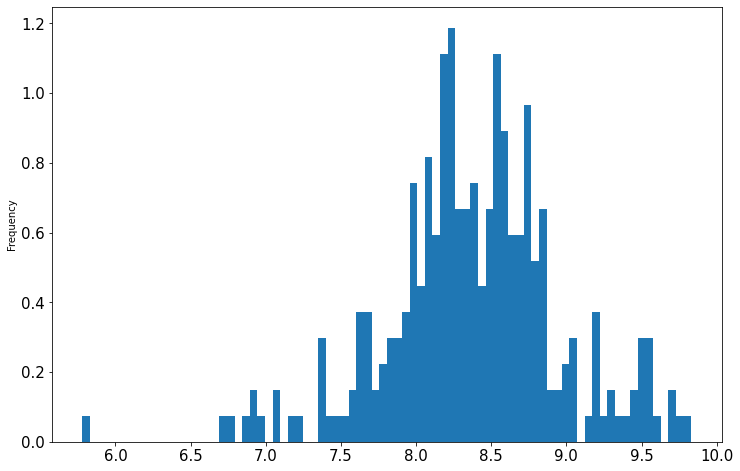

In [43]:
globalTemperature.avg_temp.plot(kind = "hist", figsize = (12,8), fontsize = 15, bins = 80, density = True)
plt.show()

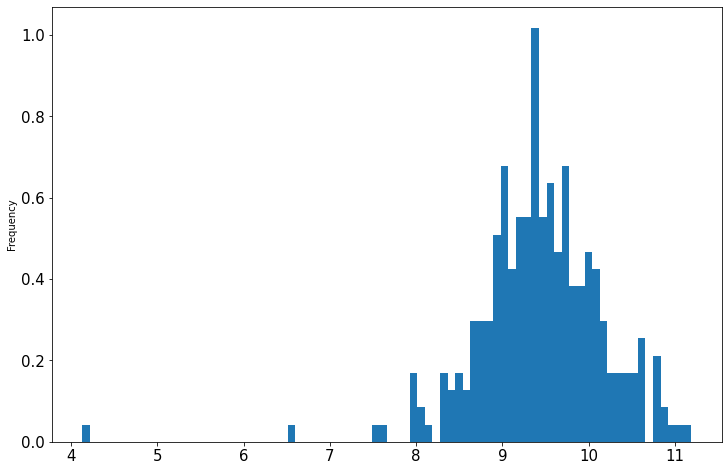

In [44]:
cityTemperature.avg_temp.plot(kind = "hist", figsize = (12,8), fontsize = 15, bins = 80, density = True)
plt.show()

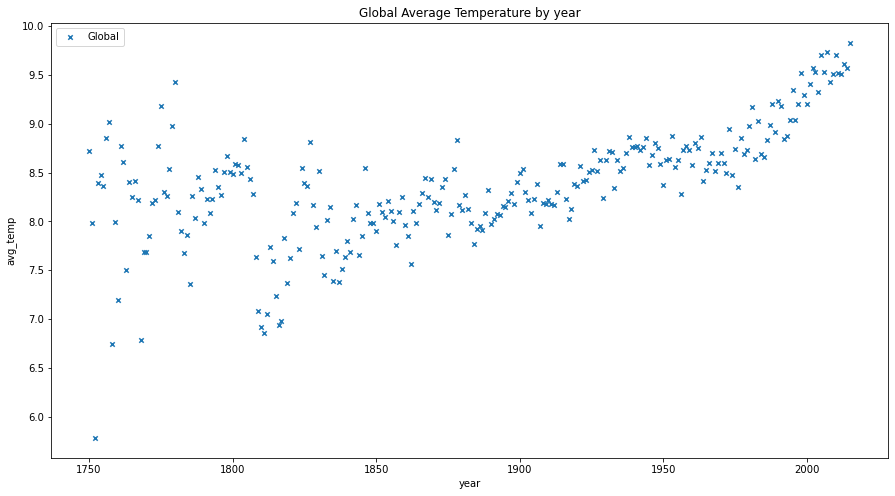

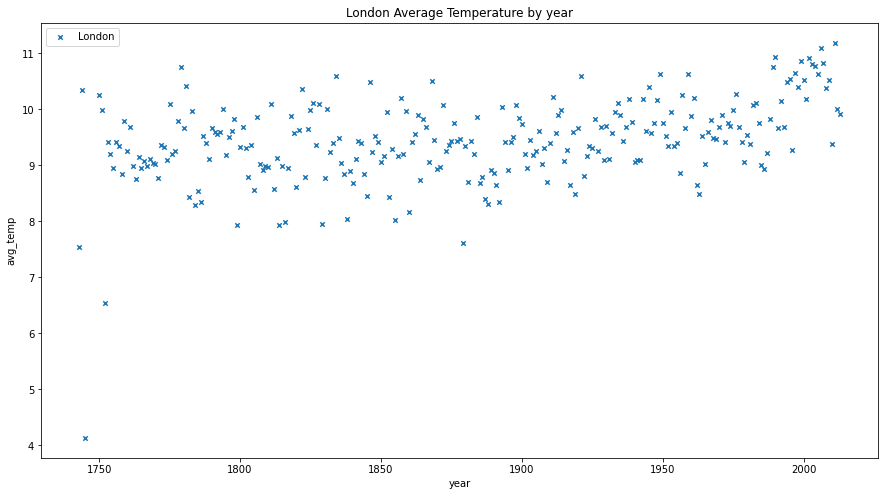

In [45]:
globalTemperature.plot(kind = "scatter", figsize = (15,8), x = "year", y = "avg_temp",  marker = "x", s = 20,label='Global', colormap= "viridis" ) 
plt.title("Global Average Temperature by year")
cityTemperature.plot(kind = "scatter", figsize = (15,8), x = "year", y = "avg_temp",  marker = "x", s = 20, label='London', colormap= "viridis" ) 
plt.title("London Average Temperature by year")
plt.show()

In [46]:
globalTemperature.avg_temp.corr(cityTemperature.avg_temp)

0.42430421512529565

<AxesSubplot:xlabel='avg_temp', ylabel='count'>

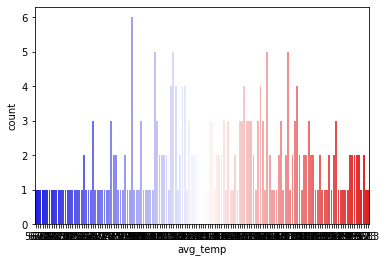

In [47]:
sns.countplot(data=globalTemperature, x='avg_temp',palette='bwr')

<AxesSubplot:xlabel='avg_temp', ylabel='count'>

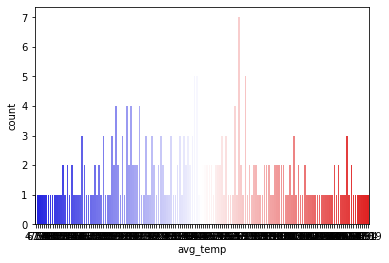

In [48]:
sns.countplot(data=cityTemperature, x='avg_temp',palette='bwr')

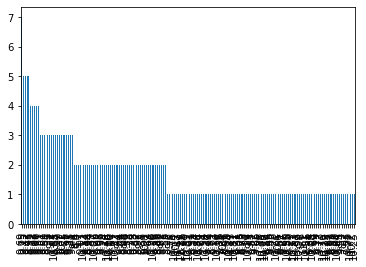

In [49]:
cityTemperature.avg_temp.value_counts().plot(kind='bar');

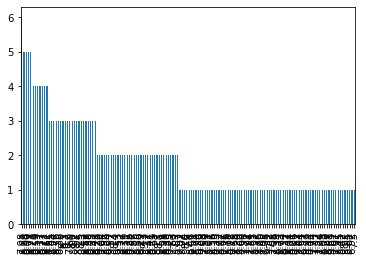

In [50]:
globalTemperature.avg_temp.value_counts().plot(kind='bar');

<AxesSubplot:xlabel='avg_temp'>

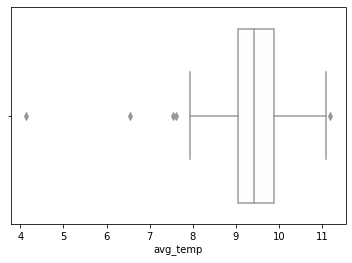

In [51]:
sns.boxplot(data=cityTemperature, x='avg_temp',palette='bwr')

<AxesSubplot:xlabel='avg_temp'>

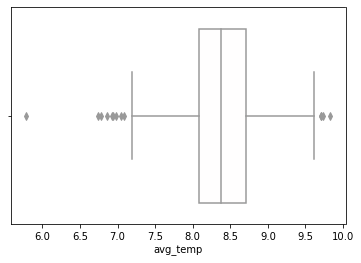

In [52]:
sns.boxplot(data=globalTemperature, x='avg_temp',palette='bwr')